# See the comparison
If you have tested on all $\mu: 0,1,2,3,4$, then you can run the following codes to see the comparison.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import json
import sys

import os
    
config_file = "config_vdpm.json"


with open(config_file, "r") as f:
    config = json.load(f)

data_path = config["data_settings"]["data_path"]
weights_path = config["nn_settings"]["weights_path"]
figures_path = config["data_settings"]["figures_path"]

mean_dict_mu_0 = np.load(
    os.path.join(data_path, "ratio_list_dict_mu_0_mean.npy"), allow_pickle=True
)
mean_dict_mu_1 = np.load(
    os.path.join(data_path, "ratio_list_dict_mu_1_mean.npy"), allow_pickle=True
)
mean_dict_mu_2 = np.load(
    os.path.join(data_path, "ratio_list_dict_mu_2_mean.npy"), allow_pickle=True
)
mean_dict_mu_3 = np.load(
    os.path.join(data_path, "ratio_list_dict_mu_3_mean.npy"), allow_pickle=True
)
mean_dict_mu_4 = np.load(
    os.path.join(data_path, "ratio_list_dict_mu_4_mean.npy"), allow_pickle=True
)


def extact_data(ratio_dict, ratio_name):
    ratio_pk = ratio_dict[()][ratio_name[0]].reshape((1, -1))
    ratio_linear = ratio_dict[()][ratio_name[1]].reshape((1, -1))
    ratio_bilinear = ratio_dict[()][ratio_name[2]].reshape((1, -1))
    return ratio_pk, ratio_linear, ratio_bilinear


mean_dict_list = [mean_dict_mu_0, mean_dict_mu_1, mean_dict_mu_2, mean_dict_mu_3, mean_dict_mu_4]

ratio_pk_list = []
ratio_linear_list = []
ratio_bilinear_list = []

ratio_name_list = ["pk", "linear", "bilinear"]


def concat_ratio_list(ratio_list):
    ratio_concat = np.concatenate(ratio_list, axis=0)
    ratio_concat = ratio_concat.T
    return ratio_concat


def concat_data(dict_list):
    pk_list = []
    linear_list = []
    bilinear_list = []

    for i in range(5):
        pk, linear, bilinear = extact_data(dict_list[i], ratio_name=ratio_name_list)
        pk_list.append(pk)
        linear_list.append(linear)
        bilinear_list.append(bilinear)

    pk_concat = concat_ratio_list(pk_list)
    linear_concat = concat_ratio_list(linear_list)
    bilinear_concat = concat_ratio_list(bilinear_list)

    return pk_concat, linear_concat, bilinear_concat


mean_pk, mean_linear, mean_bilinear = concat_data(mean_dict_list)

mean_linear_mean = np.mean(mean_linear, axis=0)
mean_bilinear_mean = np.mean(mean_bilinear, axis=0)
mean_pk_mean = np.mean(mean_pk, axis=0)

mu = [0, 1, 2, 3, 4]
mu_axis = list(range(len(mu)))


def plot_evaluate_vdpm(mu, mean, dict_plot):
    plt.plot(
        mu,
        mean,
        label=dict_plot["label"],
        marker=dict_plot["marker"],
        markersize=dict_plot["markersize"],
        color=dict_plot["color"],
        linestyle=dict_plot["linestyle"],
        linewidth=dict_plot["linewidth"],
    )


label_font = 24
ticks_font = 18
legend_font = 22


dict_plot_pk = {
    "label": "Ours",
    "marker": "*",
    "markersize": 10,
    "color": "steelblue",
    "linestyle": "-",
    "linewidth": 3,
}

dict_plot_linear = {
    "label": "M2",
    "marker": "s",
    "markersize": 10,
    "color": "darkorange",
    "linestyle": "-",
    "linewidth": 3,
}

dict_plot_bilinear = {
    "label": "M3",
    "marker": "o",
    "markersize": 10,
    "color": "forestgreen",
    "linestyle": "-",
    "linewidth": 3,
}


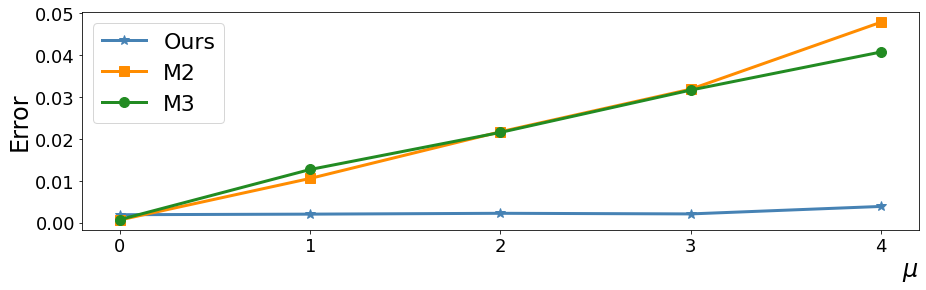

In [2]:

plt.figure(figsize=(15, 4))
plot_evaluate_vdpm(mu, mean_pk_mean, dict_plot=dict_plot_pk)
plot_evaluate_vdpm(mu, mean_linear_mean, dict_plot=dict_plot_linear)

plot_evaluate_vdpm(mu, mean_bilinear_mean, dict_plot=dict_plot_bilinear)

plt.xlabel(r"$\mu$", loc="right", fontsize=label_font)
plt.ylabel("Error", fontsize=label_font)
plt.xticks(mu_axis, mu, fontsize=ticks_font)
plt.yticks(fontsize=ticks_font)
plt.legend(fontsize=legend_font)
plt.savefig(os.path.join(figures_path, 'vdpm_comparison_.png'), dpi=200, bbox_inches='tight')
plt.savefig(os.path.join(figures_path, 'vdpm_comparison_.pdf'), dpi=200, bbox_inches='tight')

